In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 27 mile width
# 34 mile length
xvals = np.arange(0, 26)
yvals = np.arange(0, 22)

xx, yy = np.meshgrid(xvals, yvals)

In [3]:
xx = xx * 27
yy = yy * 34

In [4]:
points = np.array([xx, yy])
points = np.reshape(np.reshape(points, 22*26*2, order = 'F'), [22*26, 2])

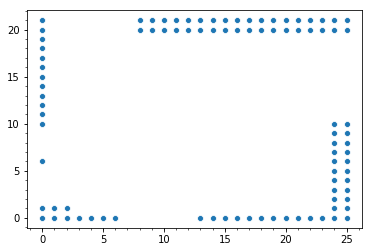

In [5]:
# delete points that are not in states.  y values multiplied by 34, x by 27.

delPoints = list(range(2)) + list(range(6, 7)) + list(range(10,22)) # first column delPoints
delPoints = delPoints + [x+22 for x in list(range(2))] + [x+44 for x in list(range(2))] # 2nd / 3rd column delPoints
delPoints = delPoints + [x*22 for x in list(range(3, 7))]    # 4th through 7th column delPoints

delPoints = delPoints + [x*22 + 21 for x in range(8, 26)]    # highest row past tip of Utah
delPoints = delPoints + [x*22 + 20 for x in range(8, 26)]    # 2nd highest row past tip of Utah

delPoints = delPoints + [x*22 for x in range(13, 26)]   # rest of bottom row
delPoints = delPoints + [24*22 + x for x in range(1, 11)]  # second to last col
delPoints = delPoints + [25*22 + x for x in range(1, 11)]  # last col

# print(delPoints)  # print row indexes of points you are deleting

# plot points you are deleting
ax = sns.scatterplot(points[delPoints,0] / 27, y=points[delPoints,1] / 34)  # create plot, scaled back down.
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))  # set minor y tics in increments of 1.
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))  # set minor x tics in increments of 1.
ax   # display plot

# deleting points in delPoints.
points = np.delete(points, delPoints, axis=0)

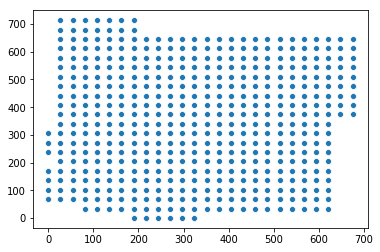

In [6]:
ax = sns.scatterplot(x=points[:,0], y=points[:,1])
ax

In [31]:
XSol200 = [92, 127, 141, 384, 331, 377]  # REMEMBER TO MINUS ONE FROM AMPL SOL
#plt.show(sns.scatterplot(x = points[XSol200, 0], y = points[XSol200, 1]))

pointsData = pd.DataFrame(points, columns = ['X','Y'])
pointsData['Sol'] = 'No'
pointsData.iloc[XSol200, 2] = 'Yes'

ax = sns.scatterplot(x='X', y='Y', hue='Sol', data = pointsData)
ax

NameError: name 'color_palette' is not defined

In [7]:
points.shape

(480, 2)

In [8]:
spd = np.zeros((480, 480))
count1 = -1
count2 = 0
for p1 in points:
    count1 += 1
    count2 = 0
    for p2 in points:
        dist = np.linalg.norm(p1 - p2)
        if (count1 > 400) and (count1 < 402) and (count2 > 140) and (count2 < 145):
            print(p1)
            print(p2)
            print(dist)
        spd[count1, count2] = dist
        count2 += 1
spd[0:10, 0:10]

[540 544]
[189 340]
405.97660031090464
[540 544]
[189 374]
390.0012820491748
[540 544]
[189 408]
376.42661967507024
[540 544]
[189 442]
365.5201772816379


array([[  0.        ,  34.        ,  68.        , 102.        ,
        170.        , 204.        , 238.        ,  27.        ,
         43.41658669,  73.1641989 ],
       [ 34.        ,   0.        ,  34.        ,  68.        ,
        136.        , 170.        , 204.        ,  43.41658669,
         27.        ,  43.41658669],
       [ 68.        ,  34.        ,   0.        ,  34.        ,
        102.        , 136.        , 170.        ,  73.1641989 ,
         43.41658669,  27.        ],
       [102.        ,  68.        ,  34.        ,   0.        ,
         68.        , 102.        , 136.        , 105.51303237,
         73.1641989 ,  43.41658669],
       [170.        , 136.        , 102.        ,  68.        ,
          0.        ,  34.        ,  68.        , 172.13076425,
        138.65424624, 105.51303237],
       [204.        , 170.        , 136.        , 102.        ,
         34.        ,   0.        ,  34.        , 205.77900768,
        172.13076425, 138.65424624],
       [23

In [9]:
'''
count1 = -1
count2 = -1

spd = np.zeros((26*22, 26*22))
for rowIndex1 in range(22):
    for colIndex1 in range(26):
        p1 = np.array([xx[rowIndex1][colIndex1], yy[rowIndex1][colIndex1]])
        count1 += 1
        count2 = -1
        for rowIndex2 in range(22):
            for colIndex2 in range(26):
                p2 = np.array([xx[rowIndex2][colIndex2], yy[rowIndex2][colIndex2]])
                count2 += 1
                dist = np.linalg.norm(p1 - p2)
                spd[count1, count2] = dist
'''       

'\ncount1 = -1\ncount2 = -1\n\nspd = np.zeros((26*22, 26*22))\nfor rowIndex1 in range(22):\n    for colIndex1 in range(26):\n        p1 = np.array([xx[rowIndex1][colIndex1], yy[rowIndex1][colIndex1]])\n        count1 += 1\n        count2 = -1\n        for rowIndex2 in range(22):\n            for colIndex2 in range(26):\n                p2 = np.array([xx[rowIndex2][colIndex2], yy[rowIndex2][colIndex2]])\n                count2 += 1\n                dist = np.linalg.norm(p1 - p2)\n                spd[count1, count2] = dist\n'

In [10]:
spd.shape

(480, 480)

In [11]:
spd[475:,475:]

array([[  0.,  34.,  68., 102., 136.],
       [ 34.,   0.,  34.,  68., 102.],
       [ 68.,  34.,   0.,  34.,  68.],
       [102.,  68.,  34.,   0.,  34.],
       [136., 102.,  68.,  34.,   0.]])

In [12]:
#np.savetxt('spd.txt', spd, fmt = '%.4f', delimiter = ' ')

In [13]:
spd[:5,:5]

array([[  0.,  34.,  68., 102., 170.],
       [ 34.,   0.,  34.,  68., 136.],
       [ 68.,  34.,   0.,  34., 102.],
       [102.,  68.,  34.,   0.,  68.],
       [170., 136., 102.,  68.,   0.]])

In [14]:
# making F matrix
numNodes = spd.shape[0]
rowIndex= -1

F = np.zeros(( int(.5 * (numNodes * (numNodes - 1))), numNodes ))

for u in range(numNodes-1):
    for v in range(u+1, numNodes):
        rowIndex += 1
        for j in range(numNodes):
            if spd[u, j] != spd[v, j]:
                F[rowIndex, j] = 1
            else:
                F[rowIndex, j] = 0

In [15]:
F.shape

(114960, 480)

In [16]:
F[:10,:10]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [17]:
F[114930:,465:]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1.

In [18]:
#np.savetxt('F.txt', F, fmt = '%d', delimiter = ' ')

In [19]:
# adding row/ col indexes to F matrix
numNodes = spd.shape[0]
rowIndex= -1

F = np.zeros(( int(.5 * (numNodes * (numNodes - 1))), numNodes ))
row_names = []
col_names = range(1, numNodes + 1)

for u in range(numNodes-1):
    for v in range(u+1, numNodes):
        row_names = row_names + [(u+1, v+1)]
        rowIndex += 1
        for j in range(numNodes):
            if spd[u, j] != spd[v, j]:
                F[rowIndex, j] = 1
            else:
                F[rowIndex, j] = 0

In [20]:
row_names[0:10]

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11)]

In [21]:
import pandas as pd
FData = pd.DataFrame(F, columns = col_names, index = row_names)
#FData.to_csv('FDataFrame.txt', sep = ' ')

In [26]:
row_names = range(1, F.shape[0]+1)
FData = pd.DataFrame(F, columns = col_names, index = row_names)
FData.to_csv('FDataFrameNums.txt', sep = ' ')

In [24]:
F.shape

(114960, 480)

In [25]:
FData.shape

(114960, 480)